# Classificando as Frutas de Acordo com as Informações Apresentadas

### Neste projeto temos uma medidas e a clssificação de uma fruta, dai queremos testar três possibilidades.

1. Qual modelo performa melhor?

2. Diminuindo as variaveis melhora o modelo? 

In [1]:
# Importando os módulos
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns 
import plotly.express as px

O link do dataset pode ser encontrado [aqui](https://www.kaggle.com/datasets/muratkokludataset/date-fruit-datasets)

In [2]:
frutas = pd.read_excel('/home/gustavo/Área de Trabalho/Proj notebooks/Date_Fruit_Datasets.xlsx')

In [3]:
frutas.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 898 entries, 0 to 897
Data columns (total 35 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   AREA           898 non-null    int64  
 1   PERIMETER      898 non-null    float64
 2   MAJOR_AXIS     898 non-null    float64
 3   MINOR_AXIS     898 non-null    float64
 4   ECCENTRICITY   898 non-null    float64
 5   EQDIASQ        898 non-null    float64
 6   SOLIDITY       898 non-null    float64
 7   CONVEX_AREA    898 non-null    int64  
 8   EXTENT         898 non-null    float64
 9   ASPECT_RATIO   898 non-null    float64
 10  ROUNDNESS      898 non-null    float64
 11  COMPACTNESS    898 non-null    float64
 12  SHAPEFACTOR_1  898 non-null    float64
 13  SHAPEFACTOR_2  898 non-null    float64
 14  SHAPEFACTOR_3  898 non-null    float64
 15  SHAPEFACTOR_4  898 non-null    float64
 16  MeanRR         898 non-null    float64
 17  MeanRG         898 non-null    float64
 18  MeanRB    

Podemos ver que não temos valores nulos e só a variavel class é um objeto, os outros ou são inteiros ou float.

In [4]:
frutas.describe()

,AREA,PERIMETER,MAJOR_AXIS,MINOR_AXIS,ECCENTRICITY,EQDIASQ,SOLIDITY,CONVEX_AREA,EXTENT,ASPECT_RATIO,...,SkewRB,KurtosisRR,KurtosisRG,KurtosisRB,EntropyRR,EntropyRG,EntropyRB,ALLdaub4RR,ALLdaub4RG,ALLdaub4RB
count,898.000000,898.000000,898.000000,898.000000,898.000000,898.000000,898.000000,898.000000,898.000000,898.000000,...,898.000000,898.000000,898.000000,898.000000,8.980000e+02,8.980000e+02,8.980000e+02,898.000000,898.000000,898.000000
mean,298295.207127,2057.660953,750.811994,495.872785,0.737468,604.577938,0.981840,303845.592428,0.736267,2.131102,...,0.250518,4.247845,5.110894,3.780928,-3.185021e+10,-2.901860e+10,-2.771876e+10,50.082888,48.805681,48.098393
std,107245.205337,410.012459,144.059326,114.268917,0.088727,119.593888,0.018157,108815.656947,0.053745,17.820778,...,0.632918,2.892357,3.745463,2.049831,2.037241e+10,1.712952e+10,1.484137e+10,16.063125,14.125911,10.813862
min,1987.000000,911.828000,336.722700,2.283200,0.344800,50.298400,0.836600,2257.000000,0.512300,1.065300,...,-1.029100,1.708200,1.607600,1.767200,-1.091224e+11,-9.261697e+10,-8.747177e+10,15.191100,20.524700,22.130000
25%,206948.000000,1726.091500,641.068650,404.684375,0.685625,513.317075,0.978825,210022.750000,0.705875,1.373725,...,-0.196950,2.536625,2.508850,2.577275,-4.429444e+10,-3.894638e+10,-3.564534e+10,38.224425,38.654525,39.250725
50%,319833.000000,2196.345450,791.363400,495.054850,0.754700,638.140950,0.987300,327207.000000,0.746950,1.524150,...,0.135550,3.069800,3.127800,3.080700,-2.826156e+10,-2.620990e+10,-2.392928e+10,53.841300,50.337800,49.614100
75%,382573.000000,2389.716575,858.633750,589.031700,0.802150,697.930525,0.991800,388804.000000,0.775850,1.674750,...,0.593950,4.449850,7.320400,4.283125,-1.460482e+10,-1.433105e+10,-1.660367e+10,63.063350,59.573600,56.666675
max,546063.000000,2811.997100,1222.723000,766.453600,1.000000,833.827900,0.997400,552598.000000,0.856200,535.525700,...,3.092300,26.171100,26.736700,32.249500,-1.627316e+08,-5.627727e+08,-4.370435e+08,79.828900,83.064900,74.104600


Podemos ver que os valores entre as variaveis não tem o mesmo peso, então será necessário normalizar.

Text(0, 0.5, 'Quantidade')

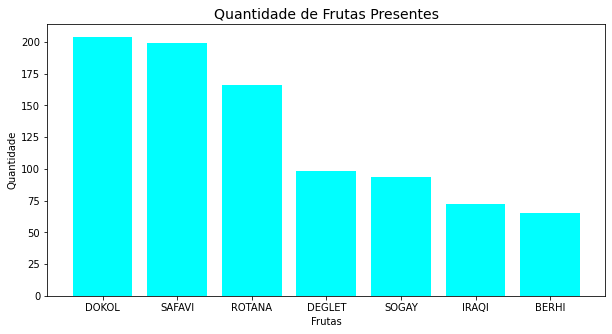

In [5]:
#Criando um gráfico de barras
nomes_frutas = ['DOKOL','SAFAVI','ROTANA','DEGLET','SOGAY','IRAQI','BERHI']
plt.figure(figsize=(10,5))
plt.title('Quantidade de Frutas Presentes',fontsize=14)
plt.bar(nomes_frutas,frutas['Class'].value_counts(),color='cyan')
plt.xlabel('Frutas')
plt.ylabel('Quantidade')

Acredito que vai se ter que dividir os dados para que o mesmo não fique enviesado, separ um com as três frutas e o outro com o resto das frutas.

Fazer o estudo dos outliers

<AxesSubplot:xlabel='Class', ylabel='AREA'>

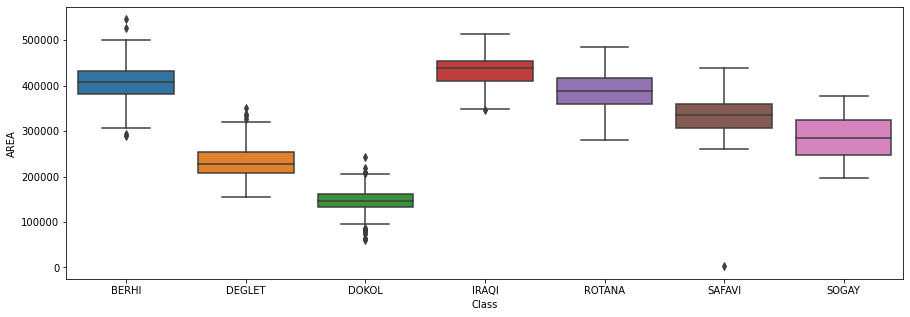

In [6]:
plt.figure(figsize=(15,5))
sns.boxplot(x='Class',y='AREA',data=frutas)

<AxesSubplot:xlabel='Class', ylabel='PERIMETER'>

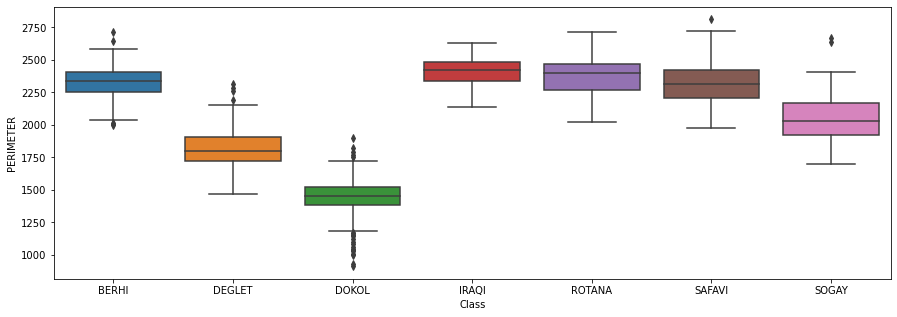

In [7]:
plt.figure(figsize=(15,5))
sns.boxplot(x='Class',y='PERIMETER',data=frutas)

In [8]:
frutas['Class'].value_counts()

DOKOL     204
SAFAVI    199
ROTANA    166
DEGLET     98
SOGAY      94
IRAQI      72
BERHI      65
Name: Class, dtype: int64

In [9]:
frutas_1 = frutas[frutas['Class']=='DOKOL'].append(frutas[frutas['Class']=='SAFAVI'].append(frutas[frutas['Class']=='ROTANA']))

/tmp/ipykernel_16232/293768214.py:1: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  frutas_1 = frutas[frutas['Class']=='DOKOL'].append(frutas[frutas['Class']=='SAFAVI'].append(frutas[frutas['Class']=='ROTANA']))
/tmp/ipykernel_16232/293768214.py:1: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  frutas_1 = frutas[frutas['Class']=='DOKOL'].append(frutas[frutas['Class']=='SAFAVI'].append(frutas[frutas['Class']=='ROTANA']))


In [10]:
frutas_1.reset_index(inplace=True)
frutas_1.drop(['index'],axis=1,inplace=True)


In [11]:
frutas_2 = frutas[frutas['Class']=='DEGLET'].append(
    frutas[frutas['Class']=='SOGAY'].append(frutas[frutas['Class']=='IRAQI'].append(frutas[frutas['Class']=='BERHI']))
)

/tmp/ipykernel_16232/184989641.py:2: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  frutas[frutas['Class']=='SOGAY'].append(frutas[frutas['Class']=='IRAQI'].append(frutas[frutas['Class']=='BERHI']))
/tmp/ipykernel_16232/184989641.py:2: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  frutas[frutas['Class']=='SOGAY'].append(frutas[frutas['Class']=='IRAQI'].append(frutas[frutas['Class']=='BERHI']))
/tmp/ipykernel_16232/184989641.py:1: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  frutas_2 = frutas[frutas['Class']=='DEGLET'].append(


In [12]:
frutas_2.reset_index(inplace=True)
frutas_2.drop(['index'],axis=1,inplace=True)


Agora vamos verificas quais dos modelos performa melhor: random forest, knn e naive bayes.

In [13]:
x = frutas_1.drop(['Class'],axis=1).values
y = frutas_1.Class.values

In [14]:
# Importando os módulos do sklearn
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split 
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB 
from sklearn.neighbors import KNeighborsClassifier

Classificando por random forest

In [15]:
x_std = StandardScaler().fit_transform(x)

In [16]:
x_treino, x_teste, y_treino, y_teste = train_test_split(x_std,y,test_size=0.4,random_state=11)

In [17]:
random_for = RandomForestClassifier()
random_for.fit(x_treino,y_treino)
y_pred = random_for.predict(x_teste)

In [18]:
confusion_matrix(y_teste,y_pred)

array([[82,  0,  0],
       [ 0, 61,  0],
       [ 1,  0, 84]])

In [19]:
print(classification_report(y_teste,y_pred))

              precision    recall  f1-score   support

       DOKOL       0.99      1.00      0.99        82
      ROTANA       1.00      1.00      1.00        61
      SAFAVI       1.00      0.99      0.99        85

    accuracy                           1.00       228
   macro avg       1.00      1.00      1.00       228
weighted avg       1.00      1.00      1.00       228



In [20]:
naive_ba = GaussianNB()
naive_ba.fit(x_treino,y_treino)
y_pred_bay = naive_ba.predict(x_teste)

In [21]:
confusion_matrix(y_teste,y_pred_bay)

array([[82,  0,  0],
       [ 0, 61,  0],
       [ 0,  0, 85]])

In [22]:
print(classification_report(y_teste,y_pred_bay))

              precision    recall  f1-score   support

       DOKOL       1.00      1.00      1.00        82
      ROTANA       1.00      1.00      1.00        61
      SAFAVI       1.00      1.00      1.00        85

    accuracy                           1.00       228
   macro avg       1.00      1.00      1.00       228
weighted avg       1.00      1.00      1.00       228



In [23]:
knn = KNeighborsClassifier()
knn.fit(x_treino,y_treino)
y_pred_knn = knn.predict(x_teste)

In [24]:
confusion_matrix(y_teste,y_pred_knn)

array([[81,  1,  0],
       [ 0, 61,  0],
       [ 0,  0, 85]])

In [25]:
print(classification_report(y_teste,y_pred_knn))

              precision    recall  f1-score   support

       DOKOL       1.00      0.99      0.99        82
      ROTANA       0.98      1.00      0.99        61
      SAFAVI       1.00      1.00      1.00        85

    accuracy                           1.00       228
   macro avg       0.99      1.00      1.00       228
weighted avg       1.00      1.00      1.00       228



In [26]:
print('Métricas do Modelo Usando Random Forest')
print(classification_report(y_teste,y_pred))
print('-'*30)
print('Métricas do Modelo Usando Naive Bayes')
print(classification_report(y_teste,y_pred_bay))
print('-'*30)
print('Métricas do Modelo Usando KNN')
print(classification_report(y_teste,y_pred_knn))

Métricas do Modelo Usando Random Forest
              precision    recall  f1-score   support

       DOKOL       0.99      1.00      0.99        82
      ROTANA       1.00      1.00      1.00        61
      SAFAVI       1.00      0.99      0.99        85

    accuracy                           1.00       228
   macro avg       1.00      1.00      1.00       228
weighted avg       1.00      1.00      1.00       228

------------------------------
Métricas do Modelo Usando Naive Bayes
              precision    recall  f1-score   support

       DOKOL       1.00      1.00      1.00        82
      ROTANA       1.00      1.00      1.00        61
      SAFAVI       1.00      1.00      1.00        85

    accuracy                           1.00       228
   macro avg       1.00      1.00      1.00       228
weighted avg       1.00      1.00      1.00       228

------------------------------
Métricas do Modelo Usando KNN
              precision    recall  f1-score   support

       DOKOL 

Olhando para o dataframe fruta 2

In [27]:
frutas_2.head()

,AREA,PERIMETER,MAJOR_AXIS,MINOR_AXIS,ECCENTRICITY,EQDIASQ,SOLIDITY,CONVEX_AREA,EXTENT,ASPECT_RATIO,...,KurtosisRR,KurtosisRG,KurtosisRB,EntropyRR,EntropyRG,EntropyRB,ALLdaub4RR,ALLdaub4RG,ALLdaub4RB,Class
0,230122,1804.3540,649.0608,454.5320,0.7139,541.2952,0.9883,232846,0.8192,1.4280,...,3.8148,2.9127,3.3667,-41959481344,-37230223360,-36367020032,66.1163,63.2356,62.4892,DEGLET
1,231946,1800.8101,678.9835,436.4881,0.7660,543.4361,0.9922,233763,0.7924,1.5556,...,3.1537,3.5782,3.2341,-25391267840,-23603490816,-28687542272,52.4342,51.0893,55.8778,DEGLET
2,218006,1754.2820,671.6726,414.5850,0.7868,526.8528,0.9930,219532,0.8089,1.6201,...,2.0128,2.3344,4.0136,-27197134848,-21465534464,-22162524160,54.3825,49.5349,51.3752,DEGLET
3,272074,2031.7810,778.5798,446.9384,0.8188,588.5706,0.9823,276985,0.8072,1.7420,...,3.0403,2.5393,2.5903,-46827319296,-45142360064,-33304205312,64.1701,62.9819,54.2980,DEGLET
4,222790,1766.3240,651.6551,436.6493,0.7423,532.6021,0.9932,224312,0.7893,1.4924,...,2.2621,2.1012,2.3364,-35503251456,-32167600128,-28105680896,60.8351,58.4294,55.3596,DEGLET


In [28]:
frutas_2.shape

(329, 35)

In [29]:
x2 = frutas_2.drop(['Class'],axis=1).values
y2 = frutas_2.Class.values

In [30]:
x2_std = StandardScaler().fit_transform(x2)

In [31]:
x2_treino, x2_teste, y2_treino, y2_teste = train_test_split(x2_std,y2,test_size=0.3,random_state=10)

In [32]:
random_for2 = RandomForestClassifier()
naive_ba2 = GaussianNB()
knn2 = KNeighborsClassifier()

In [33]:
random_for2.fit(x2_treino,y2_treino)
naive_ba2.fit(x2_treino,y2_treino)
knn2.fit(x2_treino,y2_treino)

KNeighborsClassifier()

In [34]:
y2_ra_pre = random_for2.predict(x2_teste)
y2_na_pre = naive_ba2.predict(x2_teste)
y2_knn_pre = knn2.predict(x2_teste)

In [35]:
print('Matriz de Confusão random forest')
print(confusion_matrix(y2_teste,y2_ra_pre))
print('-'*30)

print('Matriz de Confusão naive bayes')
print(confusion_matrix(y2_teste,y2_na_pre))
print('-'*30)

print('Matriz de Confusão knn')
print(confusion_matrix(y2_teste,y2_knn_pre))

Matriz de Confusão random forest
[[11  0  4  0]
 [ 0 20  0  6]
 [ 0  0 25  0]
 [ 0  4  0 29]]
------------------------------
Matriz de Confusão naive bayes
[[11  0  4  0]
 [ 0 20  0  6]
 [ 1  0 24  0]
 [ 0  4  0 29]]
------------------------------
Matriz de Confusão knn
[[12  0  3  0]
 [ 0 17  0  9]
 [ 2  0 23  0]
 [ 0  6  0 27]]


In [36]:
print('Métricas do Modelo Usando Random Forest')
print(classification_report(y2_teste,y2_ra_pre))
print('-'*30)
print('Métricas do Modelo Usando Naive Bayes')
print(classification_report(y2_teste,y2_na_pre))
print('-'*30)
print('Métricas do Modelo Usando KNN')
print(classification_report(y2_teste,y2_knn_pre))

Métricas do Modelo Usando Random Forest
              precision    recall  f1-score   support

       BERHI       1.00      0.73      0.85        15
      DEGLET       0.83      0.77      0.80        26
       IRAQI       0.86      1.00      0.93        25
       SOGAY       0.83      0.88      0.85        33

    accuracy                           0.86        99
   macro avg       0.88      0.85      0.86        99
weighted avg       0.86      0.86      0.86        99

------------------------------
Métricas do Modelo Usando Naive Bayes
              precision    recall  f1-score   support

       BERHI       0.92      0.73      0.81        15
      DEGLET       0.83      0.77      0.80        26
       IRAQI       0.86      0.96      0.91        25
       SOGAY       0.83      0.88      0.85        33

    accuracy                           0.85        99
   macro avg       0.86      0.84      0.84        99
weighted avg       0.85      0.85      0.85        99

---------------------

Observando a matriz de confusão e as metricas nesse caso pode o que perfomou bem e que poderia ser utilizado é ou o random foret ou o naive bayes já que acertou os mesmo, ma poderia ser utilizada o naive bayes já que o processamento pra se fazer o random forest é maior.

Agora iremos fazer o cross validation com o dtaframe de frutas um para se ter melhor certeza quanto a resultados.

Usando o cross-validarion parace que os tres modelos perfomam muito bem mas parece que o nayve bayes é o que melhor classifica

In [37]:
from sklearn.model_selection import cross_validate
nome_metricas = ['accuracy', 'precision_macro', 'recall_macro']
ran_f = RandomForestClassifier()
metricas_ran = cross_validate(ran_f, x_std, y, cv=7, scoring=nome_metricas)
for met in metricas_ran:
    print(f"- {met}:")
    print(f"-- {metricas_ran[met]}")
    print(f"-- {np.mean(metricas_ran[met])} +- {np.std(metricas_ran[met])}\n")  

- fit_time:
-- [1.1843946  0.78412008 0.52179885 0.5941999  0.61934376 0.64857984
 0.58145499]
-- 0.7048417159489223 +- 0.20966023984509843

- score_time:
-- [0.04208708 0.09164739 0.05245185 0.04261398 0.04893303 0.04176068
 0.03310323]
-- 0.050371033804757256 +- 0.017773358765702362

- test_accuracy:
-- [0.98780488 1.         0.98765432 1.         0.98765432 1.
 1.        ]
-- 0.9947305028605842 +- 0.006084868577529967

- test_precision_macro:
-- [0.98924731 1.         0.98611111 1.         0.98666667 1.
 1.        ]
-- 0.9945750128008193 +- 0.006327783548898196

- test_recall_macro:
-- [0.98809524 1.         0.98850575 1.         0.98809524 1.
 1.        ]
-- 0.9949566033309877 +- 0.005824990636565321



In [38]:

nb = GaussianNB()
metricas_ba = cross_validate(nb, x_std, y, cv=7, scoring=nome_metricas)
for met in metricas_ba:
    print(f"- {met}:")
    print(f"-- {metricas_ba[met]}")
    print(f"-- {np.mean(metricas_ba[met])} +- {np.std(metricas_ba[met])}\n")  

- fit_time:
-- [0.00595546 0.00720429 0.00865626 0.0067904  0.0072341  0.00325704
 0.00636005]
-- 0.006493943078177316 +- 0.0015400092825174233

- score_time:
-- [0.00566363 0.00684357 0.00666213 0.00808859 0.00695109 0.00847149
 0.01330185]
-- 0.007997478757585798 +- 0.0023307190282542563

- test_accuracy:
-- [1. 1. 1. 1. 1. 1. 1.]
-- 1.0 +- 0.0

- test_precision_macro:
-- [1. 1. 1. 1. 1. 1. 1.]
-- 1.0 +- 0.0

- test_recall_macro:
-- [1. 1. 1. 1. 1. 1. 1.]
-- 1.0 +- 0.0



In [39]:

kn = KNeighborsClassifier()
metricas_knn = cross_validate(kn, x_std, y, cv=7, scoring=nome_metricas)
for met in metricas_knn:
    print(f"- {met}:")
    print(f"-- {metricas_knn[met]}")
    print(f"-- {np.mean(metricas_knn[met])} +- {np.std(metricas_knn[met])}\n")  

- fit_time:
-- [0.00195432 0.01223588 0.00288081 0.00289536 0.0022738  0.00200868
 0.00235319]
-- 0.003800289971487863 +- 0.0034613228546357903

- score_time:
-- [0.07120347 0.0843327  0.04584575 0.04600358 0.09269619 0.0654273
 0.06500721]
-- 0.0672166006905692 +- 0.016356974174480628

- test_accuracy:
-- [1.         0.97560976 1.         1.         1.         1.
 1.        ]
-- 0.9965156794425087 +- 0.008534807466143485

- test_precision_macro:
-- [1.         0.97435897 1.         1.         1.         1.
 1.        ]
-- 0.9963369963369964 +- 0.008972489900304649

- test_recall_macro:
-- [1.         0.97701149 1.         1.         1.         1.
 1.        ]
-- 0.9967159277504105 +- 0.008044301289928363



Fazendo pelo cross validation, os tres se sairam muito bem, especialmente o naive bayes, então poderia escolher ou o knn ou o naive bayes pra usar esse modelo.

# Escolhendo as variaveis pra cerificar se perfoma quanto como com todas as variáveis

Agora iremos selecionar algumas variaveis para verificar a perfomace se é igual, maior ou menor que com todas as variaveis.

iremos puxar o histograma acima para verificar como os dados estão distribuidos.

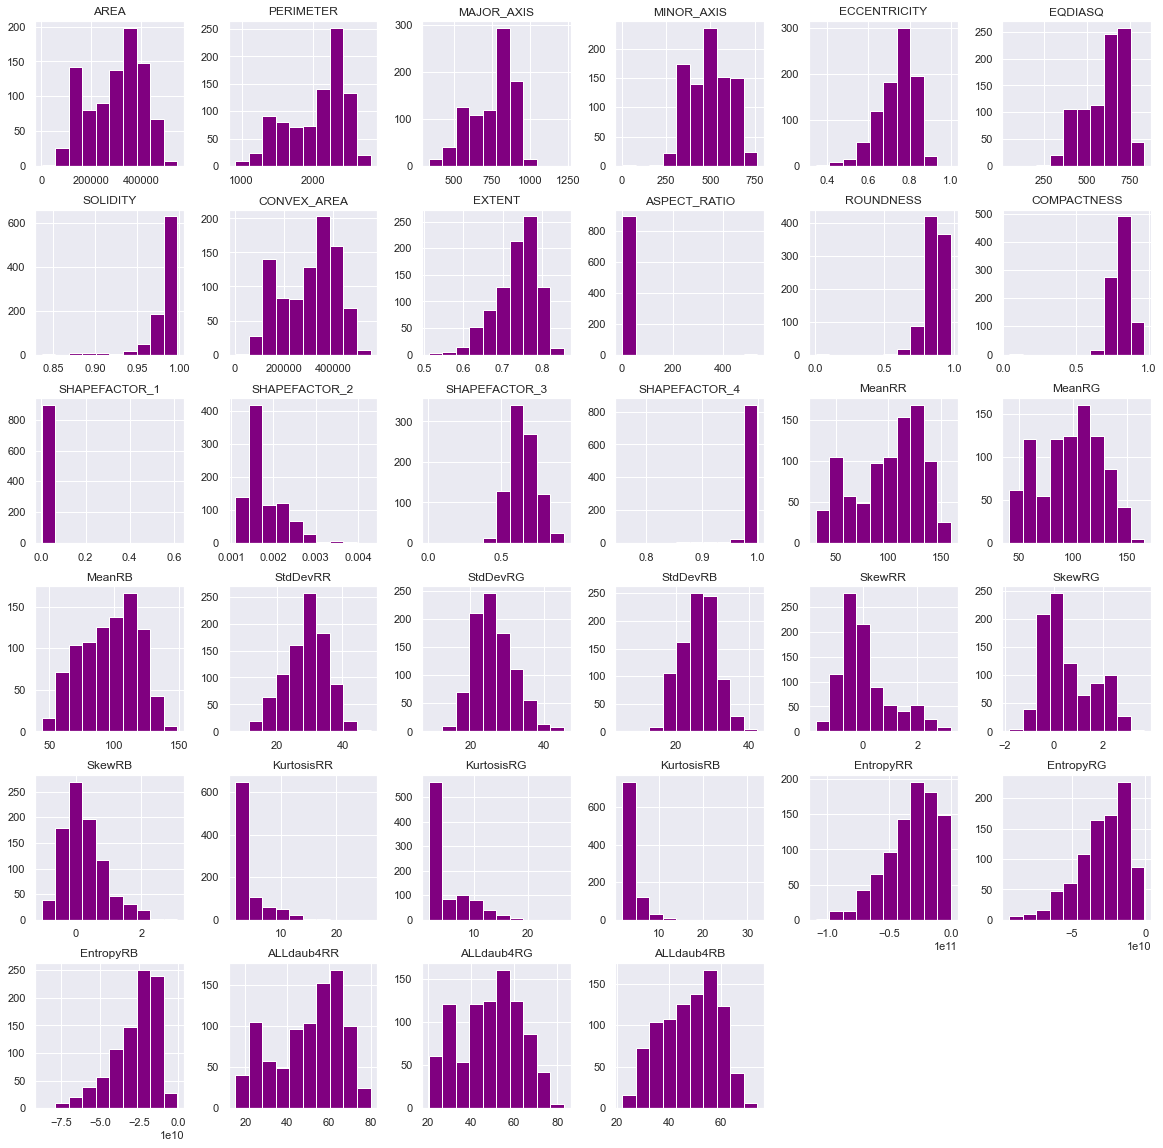

In [40]:
sns.set(style='darkgrid',rc= {'figure.figsize':(20,20)})
frutas.hist(color='purple');

Iremos avaliar as seguintes colunas de como estão distribuidas

In [41]:
frutas.columns

Index(['AREA', 'PERIMETER', 'MAJOR_AXIS', 'MINOR_AXIS', 'ECCENTRICITY',
       'EQDIASQ', 'SOLIDITY', 'CONVEX_AREA', 'EXTENT', 'ASPECT_RATIO',
       'ROUNDNESS', 'COMPACTNESS', 'SHAPEFACTOR_1', 'SHAPEFACTOR_2',
       'SHAPEFACTOR_3', 'SHAPEFACTOR_4', 'MeanRR', 'MeanRG', 'MeanRB',
       'StdDevRR', 'StdDevRG', 'StdDevRB', 'SkewRR', 'SkewRG', 'SkewRB',
       'KurtosisRR', 'KurtosisRG', 'KurtosisRB', 'EntropyRR', 'EntropyRG',
       'EntropyRB', 'ALLdaub4RR', 'ALLdaub4RG', 'ALLdaub4RB', 'Class'],
      dtype='object')

<AxesSubplot:xlabel='SOLIDITY', ylabel='Count'>

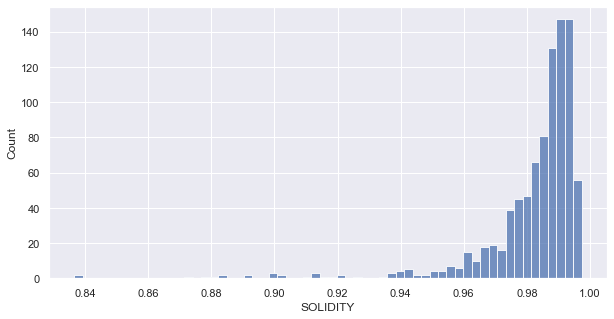

In [42]:
plt.figure(figsize=(10,5))
sns.histplot(x='SOLIDITY',data=frutas)


In [43]:
frutas.describe()

,AREA,PERIMETER,MAJOR_AXIS,MINOR_AXIS,ECCENTRICITY,EQDIASQ,SOLIDITY,CONVEX_AREA,EXTENT,ASPECT_RATIO,...,SkewRB,KurtosisRR,KurtosisRG,KurtosisRB,EntropyRR,EntropyRG,EntropyRB,ALLdaub4RR,ALLdaub4RG,ALLdaub4RB
count,898.000000,898.000000,898.000000,898.000000,898.000000,898.000000,898.000000,898.000000,898.000000,898.000000,...,898.000000,898.000000,898.000000,898.000000,8.980000e+02,8.980000e+02,8.980000e+02,898.000000,898.000000,898.000000
mean,298295.207127,2057.660953,750.811994,495.872785,0.737468,604.577938,0.981840,303845.592428,0.736267,2.131102,...,0.250518,4.247845,5.110894,3.780928,-3.185021e+10,-2.901860e+10,-2.771876e+10,50.082888,48.805681,48.098393
std,107245.205337,410.012459,144.059326,114.268917,0.088727,119.593888,0.018157,108815.656947,0.053745,17.820778,...,0.632918,2.892357,3.745463,2.049831,2.037241e+10,1.712952e+10,1.484137e+10,16.063125,14.125911,10.813862
min,1987.000000,911.828000,336.722700,2.283200,0.344800,50.298400,0.836600,2257.000000,0.512300,1.065300,...,-1.029100,1.708200,1.607600,1.767200,-1.091224e+11,-9.261697e+10,-8.747177e+10,15.191100,20.524700,22.130000
25%,206948.000000,1726.091500,641.068650,404.684375,0.685625,513.317075,0.978825,210022.750000,0.705875,1.373725,...,-0.196950,2.536625,2.508850,2.577275,-4.429444e+10,-3.894638e+10,-3.564534e+10,38.224425,38.654525,39.250725
50%,319833.000000,2196.345450,791.363400,495.054850,0.754700,638.140950,0.987300,327207.000000,0.746950,1.524150,...,0.135550,3.069800,3.127800,3.080700,-2.826156e+10,-2.620990e+10,-2.392928e+10,53.841300,50.337800,49.614100
75%,382573.000000,2389.716575,858.633750,589.031700,0.802150,697.930525,0.991800,388804.000000,0.775850,1.674750,...,0.593950,4.449850,7.320400,4.283125,-1.460482e+10,-1.433105e+10,-1.660367e+10,63.063350,59.573600,56.666675
max,546063.000000,2811.997100,1222.723000,766.453600,1.000000,833.827900,0.997400,552598.000000,0.856200,535.525700,...,3.092300,26.171100,26.736700,32.249500,-1.627316e+08,-5.627727e+08,-4.370435e+08,79.828900,83.064900,74.104600


In [44]:
frutas['ASPECT_RATIO'].unique()

array([  1.2976,   1.2161,   1.315 ,   1.2831,   1.3108,   1.3508,
         1.3631,   1.3263,   1.1956,   1.2972,   1.3388,   1.3099,
         1.1869,   1.2067,   1.3371,   1.3835,   1.2716,   1.2255,
         1.3066,   1.489 ,   1.2935,   1.3221,   1.1292,   1.3076,
         1.3145,   1.102 ,   1.2524,   1.4792,   1.2977,   1.3332,
         1.1313,   1.3231,   1.4049,   1.2938,   1.1453,   1.3307,
         1.2924,   1.2754,   1.122 ,   1.242 ,   1.3098,   1.2247,
         1.2361,   1.2892,   1.2585,   1.2565,   1.2369,   1.2628,
         1.2431,   1.145 ,   1.4873,   1.2599,   1.2508,   1.3588,
         1.3192,   1.2941,   1.2836,   1.26  ,   1.4389,   1.3885,
         1.4013,   1.2578,   1.301 ,   1.428 ,   1.5556,   1.6201,
         1.742 ,   1.4924,   1.8037,   1.6423,   1.525 ,   1.7713,
         1.8384,   1.4458,   1.7072,   1.7585,   1.6799,   1.4228,
         1.329 ,   1.7325,   1.4799,   1.6264,   1.6926,   1.568 ,
         1.451 ,   1.6552,   1.3429,   1.5144,   1.6417,   1.7

In [45]:
frutas[frutas['ASPECT_RATIO']>500]

,AREA,PERIMETER,MAJOR_AXIS,MINOR_AXIS,ECCENTRICITY,EQDIASQ,SOLIDITY,CONVEX_AREA,EXTENT,ASPECT_RATIO,...,KurtosisRR,KurtosisRG,KurtosisRB,EntropyRR,EntropyRG,EntropyRB,ALLdaub4RR,ALLdaub4RG,ALLdaub4RB,Class
615,1987,2289.3059,1222.723,2.2832,1.0,50.2984,0.8804,2257,0.8528,535.5257,...,7.3693,2.0304,7.4326,-162731632,-562772672,-437043456,47.2597,83.0649,74.1046,SAFAVI


pro aspect radio pode se perceber que os valores estão muito próximos, mas tem um valor q esta muito alto que os demais, isso pode ser um outlier

In [46]:
frutas['SHAPEFACTOR_1'].describe()


count    898.000000
mean       0.003428
std        0.020456
min        0.001700
25%        0.002200
50%        0.002600
75%        0.003200
max        0.615400
Name: SHAPEFACTOR_1, dtype: float64

In [47]:
frutas['SHAPEFACTOR_4'].describe()

count    898.000000
mean       0.988680
std        0.020473
min        0.756800
25%        0.989300
50%        0.993600
75%        0.996400
max        0.999500
Name: SHAPEFACTOR_4, dtype: float64

In [48]:
frutas['KurtosisRR'].describe()

count    898.000000
mean       4.247845
std        2.892357
min        1.708200
25%        2.536625
50%        3.069800
75%        4.449850
max       26.171100
Name: KurtosisRR, dtype: float64

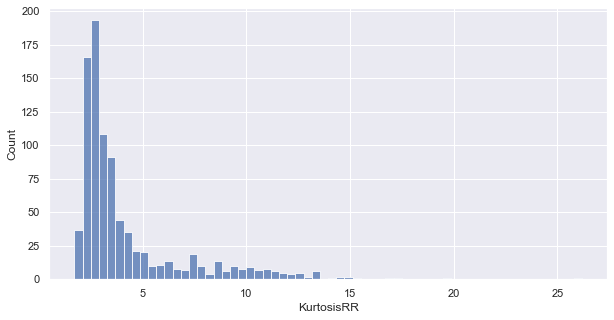

In [49]:
plt.figure(figsize=(10,5))
sns.histplot(x='KurtosisRR',data=frutas);

pode manter essa variavel do *KurtosisRR* pois tem uma variação maior do que as outas que estamos olhando

In [50]:
frutas['KurtosisRG'].describe()

count    898.000000
mean       5.110894
std        3.745463
min        1.607600
25%        2.508850
50%        3.127800
75%        7.320400
max       26.736700
Name: KurtosisRG, dtype: float64

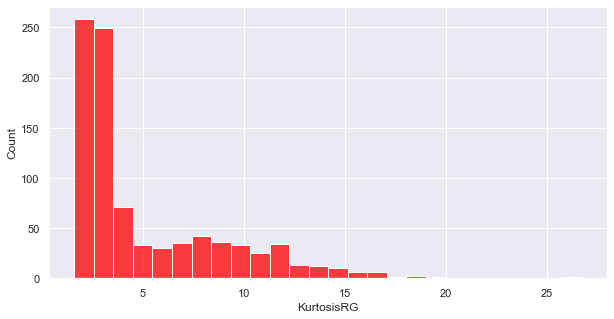

In [51]:
plt.figure(figsize=(10,5))
sns.histplot(x='KurtosisRG',data=frutas,color='red');

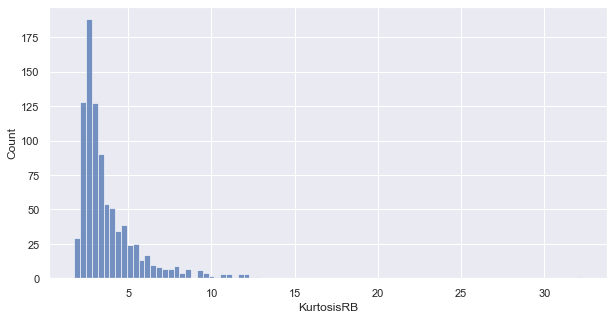

In [52]:
plt.figure(figsize=(10,5))
sns.histplot(x='KurtosisRB',data=frutas);

In [53]:
frutas['KurtosisRB'].describe()

count    898.000000
mean       3.780928
std        2.049831
min        1.767200
25%        2.577275
50%        3.080700
75%        4.283125
max       32.249500
Name: KurtosisRB, dtype: float64

podemos excluir esaa colunas já que possui valores muito pequenos: SOLIDITY',ASPECT_RATIO','SHAPEFACTOR_1'.

In [54]:
frutas_1_re = frutas_1.drop(['SOLIDITY','ASPECT_RATIO','SHAPEFACTOR_1'],axis=1)
frutas_2_re = frutas_2.drop(['SOLIDITY','ASPECT_RATIO','SHAPEFACTOR_1'],axis=1)

In [55]:
frutas_1_re

,AREA,PERIMETER,MAJOR_AXIS,MINOR_AXIS,ECCENTRICITY,EQDIASQ,CONVEX_AREA,EXTENT,ROUNDNESS,COMPACTNESS,...,KurtosisRR,KurtosisRG,KurtosisRB,EntropyRR,EntropyRG,EntropyRB,ALLdaub4RR,ALLdaub4RG,ALLdaub4RB,Class
0,138167,1370.2080,498.7525,353.9258,0.7046,419.4278,139208,0.7316,0.9248,0.8410,...,2.5951,3.7693,2.8701,-10381501440,-9775930368,-11240395776,43.0708,42.1130,45.2595,DOKOL
1,138362,1411.1870,525.3536,336.4710,0.7680,419.7237,140663,0.7797,0.8731,0.7989,...,3.6927,3.7615,2.4843,-24282138624,-23951843328,-21570297856,65.0882,65.4412,62.1085,DOKOL
2,160562,1514.4480,570.1646,359.9110,0.7756,452.1436,161971,0.7854,0.8797,0.7930,...,3.1097,2.8883,2.3741,-28332498944,-30146041856,-22212888576,64.7667,67.6564,58.5080,DOKOL
3,208042,1725.8110,649.4158,411.8994,0.7731,514.6721,209753,0.7331,0.8778,0.7925,...,2.2060,2.2021,2.7079,-24241860608,-18904291328,-16004977664,52.3850,46.5880,43.6055,DOKOL
4,143391,1416.6060,544.4253,335.9414,0.7869,427.2834,144211,0.7796,0.8979,0.7848,...,3.1254,2.5324,2.2916,-19697719296,-18499430400,-16122652672,57.7764,56.6723,52.4780,DOKOL
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,403926,2464.7891,843.9724,625.0685,0.6719,717.1433,417345,0.7473,0.8355,0.8497,...,2.9423,2.7913,2.8928,-64620326912,-64315211776,-50441998336,61.9725,62.4023,55.8575,ROTANA
565,350033,2232.9929,801.6467,558.6144,0.7172,667.5896,354582,0.7811,0.8822,0.8328,...,2.9258,2.9342,2.7258,-45076750336,-44132519936,-41153667072,55.8484,55.3751,52.8024,ROTANA
566,362994,2338.2161,834.3950,563.8201,0.7372,679.8370,374179,0.7485,0.8343,0.8148,...,2.8208,2.5208,2.7611,-46934614016,-42761355264,-35653304320,55.8311,53.4965,49.1414,ROTANA
567,468855,2620.2681,918.2051,662.6828,0.6922,772.6349,476855,0.7408,0.8581,0.8415,...,3.4798,3.3067,2.7802,-93124485120,-84190658560,-78581514240,68.8965,66.2911,63.6946,ROTANA


In [56]:
frutas_1_re.corr()['AREA']

AREA             1.000000
PERIMETER        0.967217
MAJOR_AXIS       0.905404
MINOR_AXIS       0.956622
ECCENTRICITY    -0.139044
EQDIASQ          0.994097
CONVEX_AREA      0.999433
EXTENT          -0.265024
ROUNDNESS       -0.252680
COMPACTNESS      0.099353
SHAPEFACTOR_2   -0.887785
SHAPEFACTOR_3    0.094351
SHAPEFACTOR_4   -0.108770
MeanRR          -0.335034
MeanRG          -0.379900
MeanRB          -0.331656
StdDevRR        -0.310873
StdDevRG        -0.080195
StdDevRB        -0.161998
SkewRR           0.378678
SkewRG           0.352431
SkewRB           0.214986
KurtosisRR       0.198848
KurtosisRG       0.287108
KurtosisRB       0.189127
EntropyRR       -0.393740
EntropyRG       -0.404216
EntropyRB       -0.534054
ALLdaub4RR      -0.335028
ALLdaub4RG      -0.379915
ALLdaub4RB      -0.331696
Name: AREA, dtype: float64

In [57]:
frutas_1_re.drop(['PERIMETER','MAJOR_AXIS','MINOR_AXIS','EQDIASQ','CONVEX_AREA','SHAPEFACTOR_2'],axis=1,inplace=True)

In [58]:
frutas_1_re.head()

,AREA,ECCENTRICITY,EXTENT,ROUNDNESS,COMPACTNESS,SHAPEFACTOR_3,SHAPEFACTOR_4,MeanRR,MeanRG,MeanRB,...,KurtosisRR,KurtosisRG,KurtosisRB,EntropyRR,EntropyRG,EntropyRB,ALLdaub4RR,ALLdaub4RG,ALLdaub4RB,Class
0,138167,0.7046,0.7316,0.9248,0.8410,0.7072,0.9966,86.1304,84.2102,90.5056,...,2.5951,3.7693,2.8701,-10381501440,-9775930368,-11240395776,43.0708,42.1130,45.2595,DOKOL
1,138362,0.7680,0.7797,0.8731,0.7989,0.6383,0.9966,130.1720,130.8726,124.2082,...,3.6927,3.7615,2.4843,-24282138624,-23951843328,-21570297856,65.0882,65.4412,62.1085,DOKOL
2,160562,0.7756,0.7854,0.8797,0.7930,0.6289,0.9962,129.5311,135.3102,117.0099,...,3.1097,2.8883,2.3741,-28332498944,-30146041856,-22212888576,64.7667,67.6564,58.5080,DOKOL
3,208042,0.7731,0.7331,0.8778,0.7925,0.6281,0.9903,104.7724,93.1733,87.2115,...,2.2060,2.2021,2.7079,-24241860608,-18904291328,-16004977664,52.3850,46.5880,43.6055,DOKOL
4,143391,0.7869,0.7796,0.8979,0.7848,0.6160,0.9982,115.5527,113.3419,104.9527,...,3.1254,2.5324,2.2916,-19697719296,-18499430400,-16122652672,57.7764,56.6723,52.4780,DOKOL


In [59]:
#fazendo rfe
from sklearn.feature_selection import RFE
x_re_1 = frutas_1_re.drop(['Class'],axis=1)
y_re_1 = frutas_1_re.Class
selector = RandomForestClassifier()
select = RFE(selector, n_features_to_select=12, step=1)
select = select.fit(x_re_1, y_re_1)
select.get_feature_names_out()

array(['AREA', 'SHAPEFACTOR_4', 'MeanRR', 'MeanRG', 'MeanRB', 'SkewRG',
       'EntropyRR', 'EntropyRG', 'EntropyRB', 'ALLdaub4RR', 'ALLdaub4RG',
       'ALLdaub4RB'], dtype=object)

In [60]:
x_12 = frutas_1_re[['AREA', 'SHAPEFACTOR_4', 'MeanRR', 'MeanRG', 'MeanRB', 'SkewRG',
       'KurtosisRG', 'EntropyRR', 'EntropyRG', 'EntropyRB', 'ALLdaub4RR',
       'ALLdaub4RG']]
y_12 = frutas_1_re.Class

In [61]:
x_12_std = StandardScaler().fit_transform(x_12)

In [62]:
random_for3 = RandomForestClassifier()
metricas_for3 = cross_validate(random_for3, x_12_std, y, cv=8, scoring=nome_metricas)
for met in metricas_for3:
    print(f"- {met}:")
    print(f"-- {metricas_for3[met]}")
    print(f"-- {np.mean(metricas_for3[met])} +- {np.std(metricas_for3[met])}\n")  

- fit_time:
-- [1.05848312 0.64142752 0.8842411  0.46794009 1.07892299 0.55063081
 0.57453418 0.58303356]
-- 0.7299016714096069 +- 0.22580445006278885

- score_time:
-- [0.05435562 0.08598161 0.05327582 0.09370112 0.13807487 0.06677461
 0.054883   0.08248377]
-- 0.07869130373001099 +- 0.026847368255546795

- test_accuracy:
-- [0.98611111 1.         0.98591549 1.         1.         0.98591549
 1.         1.        ]
-- 0.9947427621283256 +- 0.006787299826694057

- test_precision_macro:
-- [0.98765432 1.         0.98717949 1.         1.         0.98484848
 1.         1.        ]
-- 0.9949602866269533 +- 0.006549428062660059

- test_recall_macro:
-- [0.98666667 1.         0.98717949 1.         1.         0.98666667
 1.         1.        ]
-- 0.9950641025641026 +- 0.006373935563634297



In [63]:
naive_ba3 = GaussianNB()
metricas_ba3 = cross_validate(naive_ba3, x_12_std, y, cv=8, scoring=nome_metricas)
for met in metricas_ba3:
    print(f"- {met}:")
    print(f"-- {metricas_ba3[met]}")
    print(f"-- {np.mean(metricas_ba3[met])} +- {np.std(metricas_ba3[met])}\n")  

- fit_time:
-- [0.01175404 0.01386905 0.01526642 0.01552701 0.01715422 0.01627898
 0.01562262 0.01151752]
-- 0.0146237313747406 +- 0.001930775763201685

- score_time:
-- [0.02266717 0.01677346 0.01589632 0.02021194 0.07679439 0.01930404
 0.04954982 0.02042603]
-- 0.030202895402908325 +- 0.020313409156899023

- test_accuracy:
-- [0.98611111 0.98591549 0.98591549 1.         1.         0.98591549
 1.         1.        ]
-- 0.9929821987480438 +- 0.007018056845934144

- test_precision_macro:
-- [0.98765432 0.98717949 0.98717949 1.         1.         0.98717949
 1.         1.        ]
-- 0.9936490978157645 +- 0.0063525661034424955

- test_recall_macro:
-- [0.98666667 0.98717949 0.98717949 1.         1.         0.98666667
 1.         1.        ]
-- 0.9934615384615385 +- 0.006540974881448237



In [64]:
knn3 = KNeighborsClassifier()
metricas_knn3 = cross_validate(knn3, x_12_std, y, cv=8, scoring=nome_metricas)
for met in metricas_knn3:
    print(f"- {met}:")
    print(f"-- {metricas_knn3[met]}")
    print(f"-- {np.mean(metricas_knn3[met])} +- {np.std(metricas_knn3[met])}\n")  

- fit_time:
-- [0.01078463 0.00316954 0.00279617 0.01320863 0.00452352 0.01550794
 0.01004052 0.01264191]
-- 0.009084105491638184 +- 0.004610598359701536

- score_time:
-- [0.04151058 0.01791382 0.02395391 0.0287497  0.05737758 0.04415703
 0.04336596 0.01859283]
-- 0.03445267677307129 +- 0.013307903553700004

- test_accuracy:
-- [0.98611111 0.97183099 1.         1.         1.         1.
 1.         1.        ]
-- 0.9947427621283256 +- 0.009780632576334892

- test_precision_macro:
-- [0.98765432 0.96969697 1.         1.         1.         1.
 1.         1.        ]
-- 0.994668911335578 +- 0.010267213503665534

- test_recall_macro:
-- [0.98666667 0.97435897 1.         1.         1.         1.
 1.         1.        ]
-- 0.9951282051282051 +- 0.008981681993916378



Agora aplicando para as frutas 2

In [65]:
frutas_2_re.drop(['PERIMETER','MAJOR_AXIS','MINOR_AXIS','EQDIASQ','CONVEX_AREA','SHAPEFACTOR_2'],axis=1,inplace=True)

In [66]:
x_12_2 = frutas_2_re[['AREA', 'SHAPEFACTOR_4', 'MeanRR', 'MeanRG', 'MeanRB', 'SkewRG',
       'KurtosisRG', 'EntropyRR', 'EntropyRG', 'EntropyRB', 'ALLdaub4RR',
       'ALLdaub4RG']]
y_12_2 = frutas_2_re.Class

In [67]:
x_12_2_std = StandardScaler().fit_transform(x_12_2)

In [68]:
x3_treino, x3_teste, y3_treino, y3_teste = train_test_split(x_12_2_std,y_12_2,test_size=0.3,random_state=10)

In [69]:
random_for4 = RandomForestClassifier()
random_for4.fit(x3_treino,y3_treino)
y3_pred_f = random_for4.predict(x3_teste)

In [84]:
cf2_rf = confusion_matrix(y3_teste,y3_pred_f)
print(cf2_rf)

[[11  0  4  0]
 [ 0 19  0  7]
 [ 2  0 23  0]
 [ 0  4  0 29]]


In [71]:
print(classification_report(y3_teste,y3_pred_f))

              precision    recall  f1-score   support

       BERHI       0.85      0.73      0.79        15
      DEGLET       0.83      0.73      0.78        26
       IRAQI       0.85      0.92      0.88        25
       SOGAY       0.81      0.88      0.84        33

    accuracy                           0.83        99
   macro avg       0.83      0.82      0.82        99
weighted avg       0.83      0.83      0.83        99



In [75]:
naive_ba4 = GaussianNB()
naive_ba4.fit(x3_treino,y3_treino)
y3_pred_na = naive_ba4.predict(x3_teste)

In [87]:
cf2_nb = confusion_matrix(y3_teste,y3_pred_na)
print(cf2_nb)

[[ 9  0  6  0]
 [ 0 19  1  6]
 [ 1  0 24  0]
 [ 1  9  5 18]]


In [77]:
print(classification_report(y3_teste,y3_pred_na))

              precision    recall  f1-score   support

       BERHI       0.82      0.60      0.69        15
      DEGLET       0.68      0.73      0.70        26
       IRAQI       0.67      0.96      0.79        25
       SOGAY       0.75      0.55      0.63        33

    accuracy                           0.71        99
   macro avg       0.73      0.71      0.70        99
weighted avg       0.72      0.71      0.70        99



In [78]:
knn4 = KNeighborsClassifier()
knn4.fit(x3_treino,y3_treino)
y3_pred_knn = knn4.predict(x3_teste)

In [86]:
cf2_knn = confusion_matrix(y3_teste,y3_pred_knn)
print(cf2_knn)

[[10  0  5  0]
 [ 0 20  0  6]
 [ 2  0 23  0]
 [ 1  4  0 28]]


In [80]:
print(classification_report(y3_teste,y3_pred_knn))

              precision    recall  f1-score   support

       BERHI       0.77      0.67      0.71        15
      DEGLET       0.83      0.77      0.80        26
       IRAQI       0.82      0.92      0.87        25
       SOGAY       0.82      0.85      0.84        33

    accuracy                           0.82        99
   macro avg       0.81      0.80      0.80        99
weighted avg       0.82      0.82      0.82        99



Text(557.1588235294118, 0.5, 'Valor real')

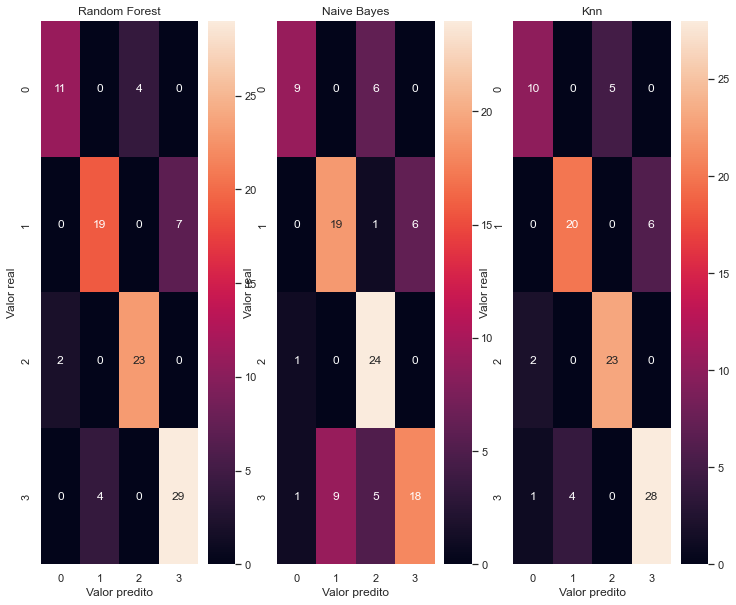

In [101]:
plt.figure(figsize=(12,10))

plt.subplot(1,3,1)
plt.title('Random Forest')
sns.heatmap(cf2_rf,annot=True)
plt.xlabel('Valor predito')
plt.ylabel('Valor real')

plt.subplot(1,3,2)
plt.title('Naive Bayes')
sns.heatmap(cf2_nb,annot=True)
plt.xlabel('Valor predito')
plt.ylabel('Valor real')

plt.subplot(1,3,3)
plt.title('Knn')
sns.heatmap(cf2_knn,annot=True)
plt.xlabel('Valor predito')
plt.ylabel('Valor real')

In [102]:
print('Métricas dos Modelos')
print('1 - Random Forest')
print(classification_report(y3_teste,y3_pred_f))
print('-'*40)
print('2-Naive Bayes')
print(classification_report(y3_teste,y3_pred_na))
print('-'*40)
print('3- Knn')
print(classification_report(y3_teste,y3_pred_knn))

Métricas dos Modelos
1 - Random Forest
              precision    recall  f1-score   support

       BERHI       0.85      0.73      0.79        15
      DEGLET       0.83      0.73      0.78        26
       IRAQI       0.85      0.92      0.88        25
       SOGAY       0.81      0.88      0.84        33

    accuracy                           0.83        99
   macro avg       0.83      0.82      0.82        99
weighted avg       0.83      0.83      0.83        99

----------------------------------------
2-Naive Bayes
              precision    recall  f1-score   support

       BERHI       0.82      0.60      0.69        15
      DEGLET       0.68      0.73      0.70        26
       IRAQI       0.67      0.96      0.79        25
       SOGAY       0.75      0.55      0.63        33

    accuracy                           0.71        99
   macro avg       0.73      0.71      0.70        99
weighted avg       0.72      0.71      0.70        99

------------------------------------